<a href="https://colab.research.google.com/github/Aashi-sharma/Spotify_ETL_Data_Analysis/blob/main/Spotify_ETL_Data_Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.  https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets
2.   
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
%matplotlib inline
!pip install plotly
import plotly.figure_factory as ff
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [2]:
df_tracks = pd.read_csv("tracks.csv")
df_tracks.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
# Check null values
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [4]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
sorted_df = df_tracks.sort_values('popularity', ascending = True).head (10)
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4
546218,0qrKnQtYDVJhKFAXTHYVS9,ゆうべはどうしたの (WHATSA MALLA U),0,183427,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.631,0.249,5,-11.883,1,0.0355,0.951,0.000000,0.0814,0.517,131.097,4
546217,0nqsDxOeKSwEzp3AUQAAqS,"Screen Director's Playhouse, Music For Million...",0,1767071,0,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...","['2rbm8QWvmnVwxFo84EVM1h', '4yW5adMgyIfHFzaL9i...",1949-04-10,0.533,0.317,7,-13.047,1,0.9180,0.682,0.000000,0.3330,0.336,76.836,4
546216,0kGEdsxVLYjCdfxM9tbezd,ブルーマンボ,0,162147,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.529,0.546,0,-6.462,0,0.0418,0.784,0.000000,0.3750,0.903,128.604,4
546215,0bc3PUZurUUXrY7yqoOxjq,"Screen Director's Playhouse, Trade Winds direc...",0,1776652,0,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...","['7hkhJTTI3VnUGVWUt8SJXT', '3kYeeIpRCgJz4fQYDv...",1949-05-19,0.599,0.321,0,-15.428,0,0.9330,0.808,0.000000,0.5570,0.379,93.025,4
546214,0Wwm0ruSjYMIiWG0nyAI1F,"Screen Director's Playhouse, It's A Wonderful ...",0,1767576,0,"['Joseph Granby', 'Jimmy Stewart', 'Irene Tedr...","['6GK59BC4LJzqR0OpHAX2S3', '58BzBaExrnrx898sby...",1949-05-08,0.645,0.341,8,-12.177,1,0.8670,0.690,0.000000,0.1530,0.431,117.591,4


In [6]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [7]:
most_popular = df_tracks.query('popularity>90', inplace = False).sort_values('popularity',ascending = False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


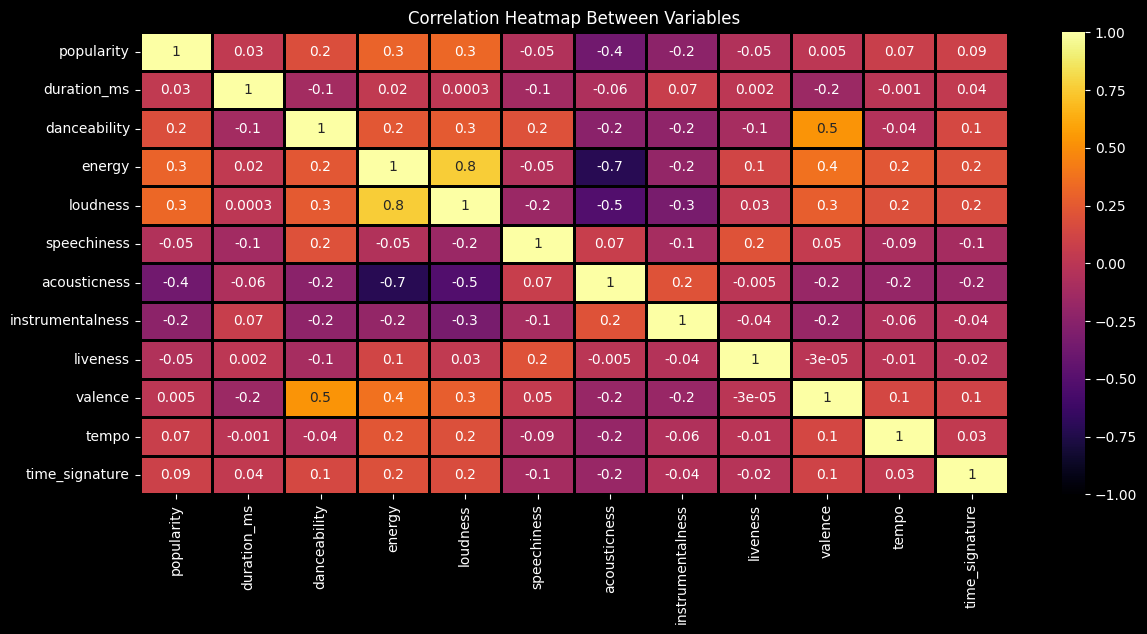

In [9]:
corr_df = df_tracks.drop(["key","mode","explicit"], axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
plt.style.use('dark_background')
# annot writes each value of dataset in cell
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

plotly_fig = ff.create_annotated_heatmap(z=corr_df.values, x=list(corr_df.columns), y=list(corr_df.index), colorscale="inferno")

# Save the Plotly figure as an HTML file
plotly_fig.write_html('Correlation_matrix.html')

In [10]:
df_tracks.set_index("release_date", inplace=True)
df_tracks.index = pd.to_datetime(df_tracks.index)
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [11]:
df_tracks['dates'] = df_tracks.index.get_level_values('release_date')
df_tracks.dates = pd.to_datetime(df_tracks.dates)
years = df_tracks.dates.dt.year

'Number_of_songs_per_year.html'

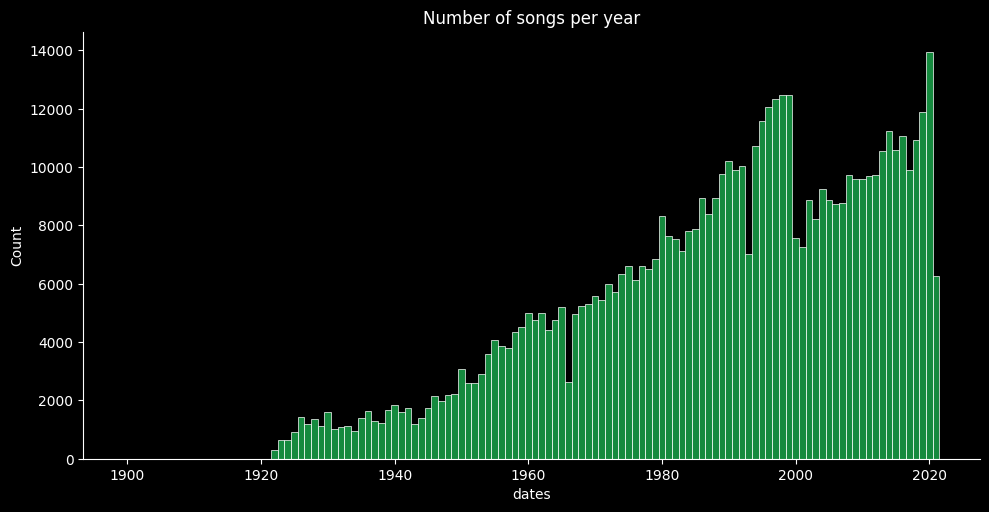

In [11]:
plt.style.use('dark_background')

# Create a bar plot with Spotify's green color
fig = sns.displot(years, discrete=True, aspect=2, height=5, kind="hist", color="#1DB954").set(title="Number of songs per year")

# Convert the Seaborn displot to Plotly figure using plotly.figure_factory.create
plotly_fig = ff.create_distplot([years], group_labels=["Number of songs per year"], colors=["#1DB954"])


# Save the Plotly figure as HTML using Plotly
pyo.plot(plotly_fig, filename='Number_of_songs_per_year.html')


In [12]:
df_tracks['duration'] = df_tracks['duration_ms'].apply(lambda x:round(x/1000))
#Drop the duration_ms column
df_tracks.drop('duration_ms', inplace=True, axis=1)
df_tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

'Year_vs_Duration_Bg.html'

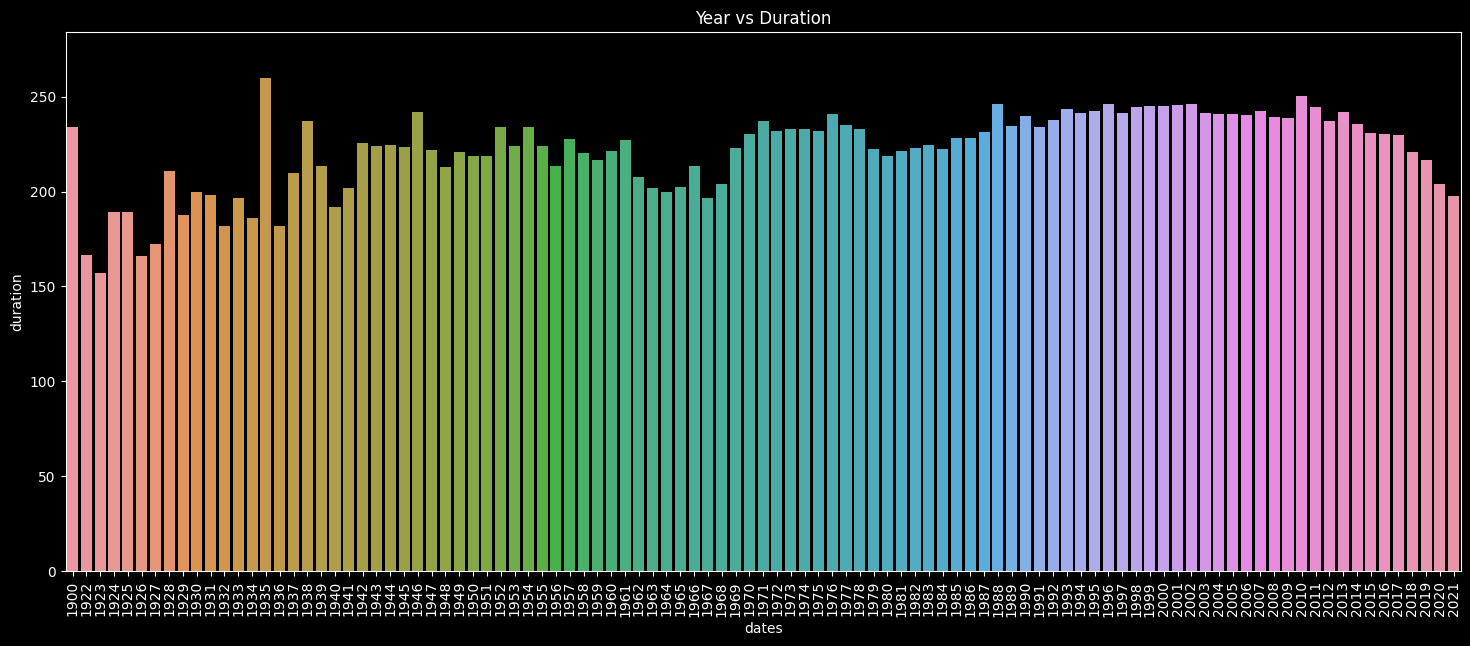

In [13]:
total_duration = df_tracks.duration
# Set a dark background using Matplotlib
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (18,7))
fig = sns.barplot(x = years, y = total_duration, ax=ax, errwidth = False).set(title="Year vs Duration")
plt.xticks(rotation=90)

# Save the Matplotlib figure as HTML using Plotly
pyo.plot(plotly_fig, filename='Year_vs_Duration_Bg.html')

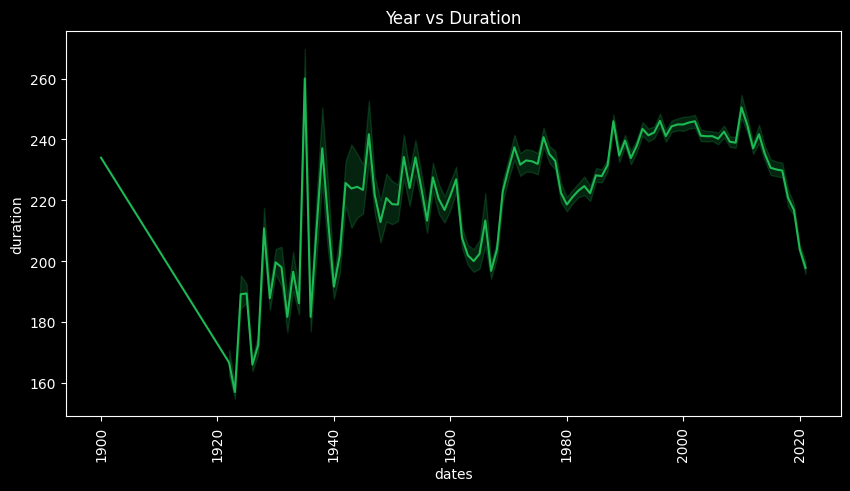

'Duration_of_the_songs_in_different_genres.html'

In [14]:
from plotly.tools import mpl_to_plotly
# Set a black background using Matplotlib
plt.style.use('dark_background')

# Create a lineplot with Spotify's green color
fig, ax = plt.subplots(figsize=(10, 5))
fig = sns.lineplot(x=years, y=total_duration, ax=ax, color="#1DB954").set(title="Year vs Duration")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Save the Plotly figure as HTML
pyo.plot(plotly_fig, filename='Duration_of_the_songs_in_different_genres.html')

In [15]:
df_genre = pd.read_csv('SpotifyFeatures.csv')
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [16]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

'Duration_of_the_songs_in_different_genres.html'

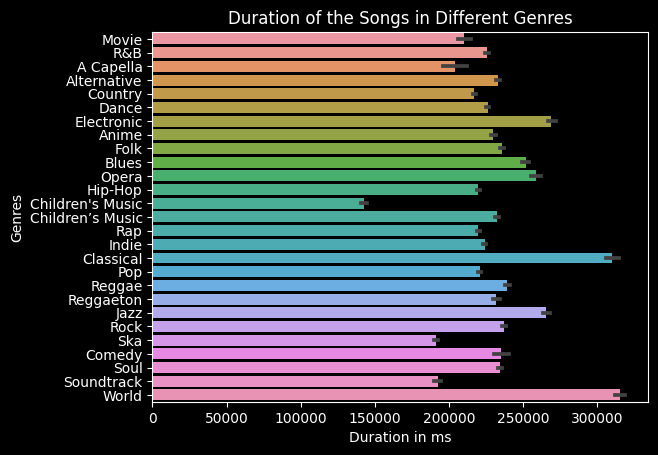

In [17]:
plt.title("Duration of the Songs in Different Genres")
# Set a black background using Matplotlib
plt.style.use('dark_background')
sns.color_palette("rocket", as_cmap=True)
sns.barplot(y='genre',x='duration_ms',data=df_genre)
plt.xlabel("Duration in ms")
plt.ylabel("Genres")

# Save the Plotly figure as HTML
pyo.plot(plotly_fig, filename='Duration_of_the_songs_in_different_genres.html')


'Top_five_genres_based_on_popularity.html'

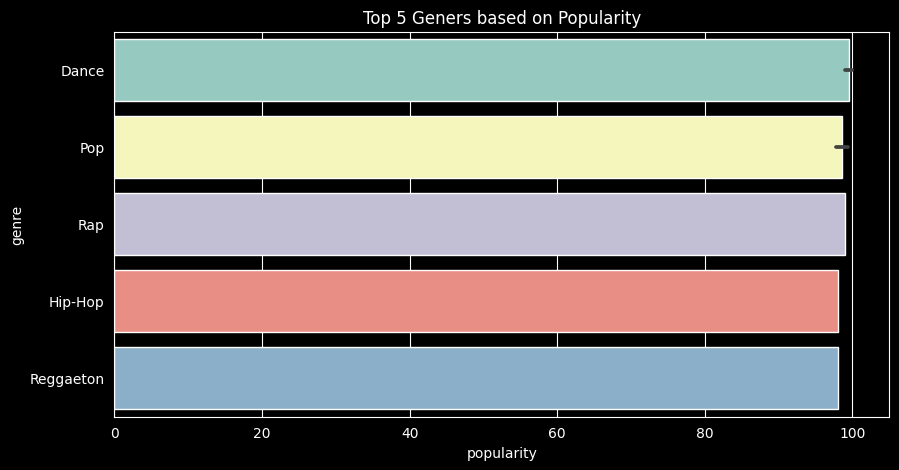

In [18]:
sns.set_style(style="darkgrid")
# Set a black background using Matplotlib
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
famous = df_genre.sort_values("popularity", ascending=False).head(10)
sns.barplot(y='genre',x='popularity', data=famous).set(title="Top 5 Geners based on Popularity")
# Save the plot as an HTML file
pyo.plot(plotly_fig, filename='Top_five_genres_based_on_popularity.html')